In [50]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('fivethirtyeight')
sns.set(style = 'whitegrid', color_codes = True)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Data

In [51]:
df = pd.read_csv('Data/TRAIN.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Preprocessing

In [53]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [54]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [55]:
df.corr()['price_range'].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Looks like RAM is very important feature

## Model

In [56]:
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [57]:
X = df.drop('price_range', axis = 1)
y = df.price_range

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
models = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]
model_names=['LogisticRegression', 'LinearSVM', 'rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}


for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))
     
d={'Model':model_names,'Accuracy':acc}
d

C:\Users\Adarsh\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Adarsh\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Model': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.6325, 0.485, 0.965, 0.9425, 0.885, 0.8225, 0.9075, 0.7975]}

In [60]:
acc_df = pd.DataFrame(d)
acc_df.sort_values(by= 'Accuracy', ascending = False)

,Model,Accuracy
2,rbfSVM,0.9650
3,KNearestNeighbors,0.9425
6,GradientBoostingClassifier,0.9075
4,RandomForestClassifier,0.8850
5,DecisionTree,0.8225
7,GaussianNB,0.7975
0,LogisticRegression,0.6325
1,LinearSVM,0.4850


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

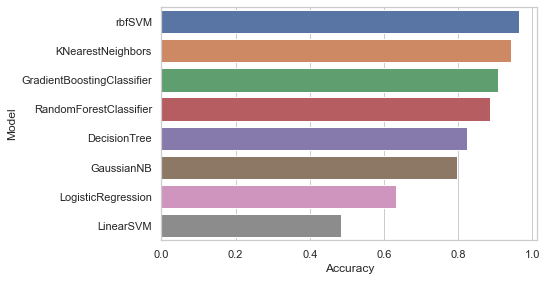

In [61]:
sns.barplot(y = 'Model', x = 'Accuracy', data = acc_df.sort_values(by = 'Accuracy', ascending = False))

So SVC is having best accuracy, let's make it better by GridSearchCV

## Grid Search in SVC

In [63]:
%%time

parameters = {
    'C': [0.001, 0.01, 0.1, 1.],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

model_svc = SVC(random_state = 42, class_weight = 'balanced', probability = True)
model_svc = GridSearchCV(model_svc, parameters, cv=5, scoring='accuracy', n_jobs = -1)
model_svc.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
print('-----')

-----
Best parameters {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Mean cross-validated accuracy score of the best_estimator: 0.977
-----
Wall time: 2min 1s


## That's it !!